The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [142]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Start coding here!
nobel_prize_data=pd.read_csv("data/nobel.csv")
nobel_prize_df=pd.DataFrame(nobel_prize_data)

In [143]:
# the most awarded gender
top_gender=nobel_prize_df["sex"].value_counts().index[0]
nb_awards_top_gender=nobel_prize_df["sex"].value_counts().iloc[0]
print(f"The most awarded gender is {top_gender} with {nb_awards_top_gender} awards!")

The most awarded gender is Male with 905 awards!


In [144]:
# the most awarded country
top_country=nobel_prize_df["birth_country"].value_counts().idxmax()
nb_awards_top_country=nobel_prize_df["birth_country"].value_counts().max()
print(f"The most awarded country is: {top_country} with {nb_awards_top_country} awards!")

The most awarded country is: United States of America with 291 awards!


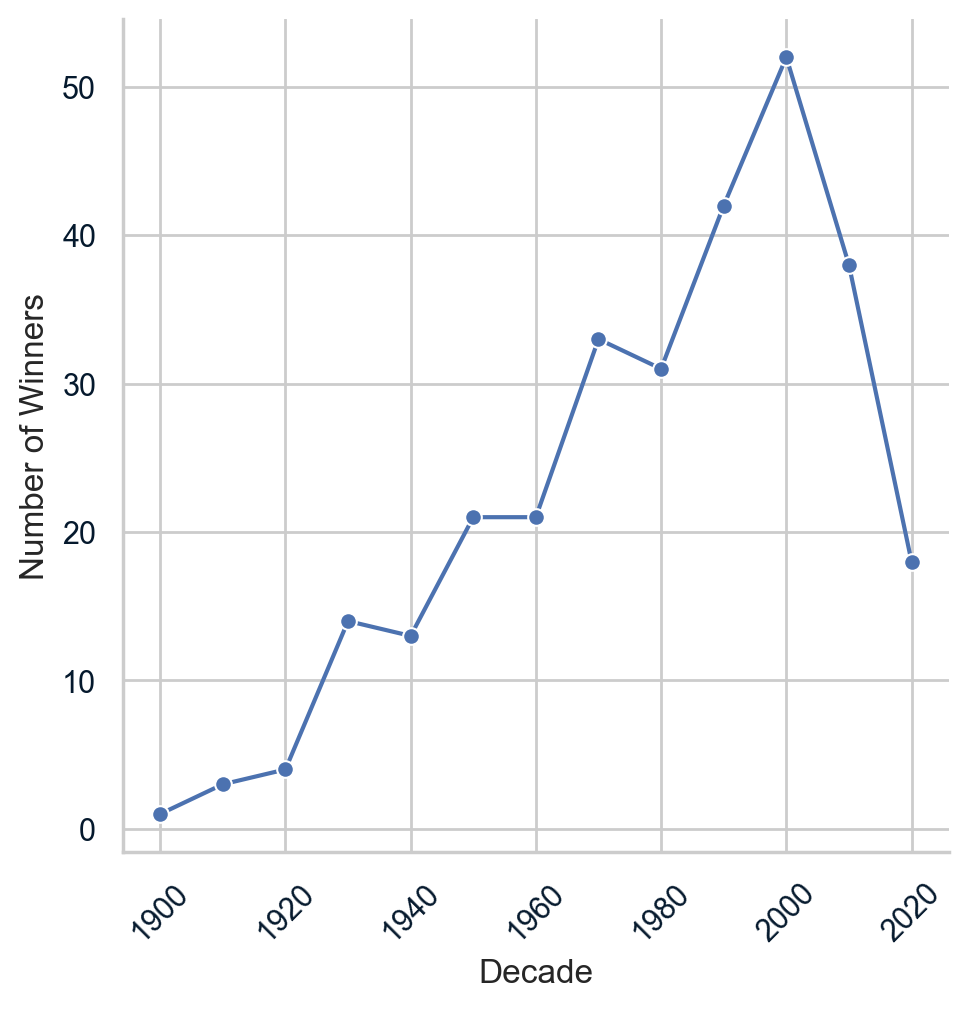

The most successful decade for the USA is: 2000


In [145]:
# the most successful year for usa
usa_df = nobel_prize_df[nobel_prize_df["birth_country"] == "United States of America"]
usa_df["the_decade"] = (usa_df["year"] // 10) * 10

decade_counts = usa_df["the_decade"].value_counts().reset_index()
decade_counts.columns = ['decade', 'count']
the_most_successful_decade = decade_counts['decade'].values[0]  # give the first element of the numpy array created

sns.set(style="whitegrid")  
ax = sns.relplot(x="decade", y="count", data=decade_counts, kind="line", marker="o")
ax.set_axis_labels("Decade", "Number of Winners")
ax.set_titles("Number of Nobel Prize Winners from the USA by Decade")
plt.xticks(rotation=45)   
plt.show()

print(f"The most successful decade for the USA is: {the_most_successful_decade}")

The maximum combination is:
Decade: 2010, Category: Peace, Count of Female Winners: 5


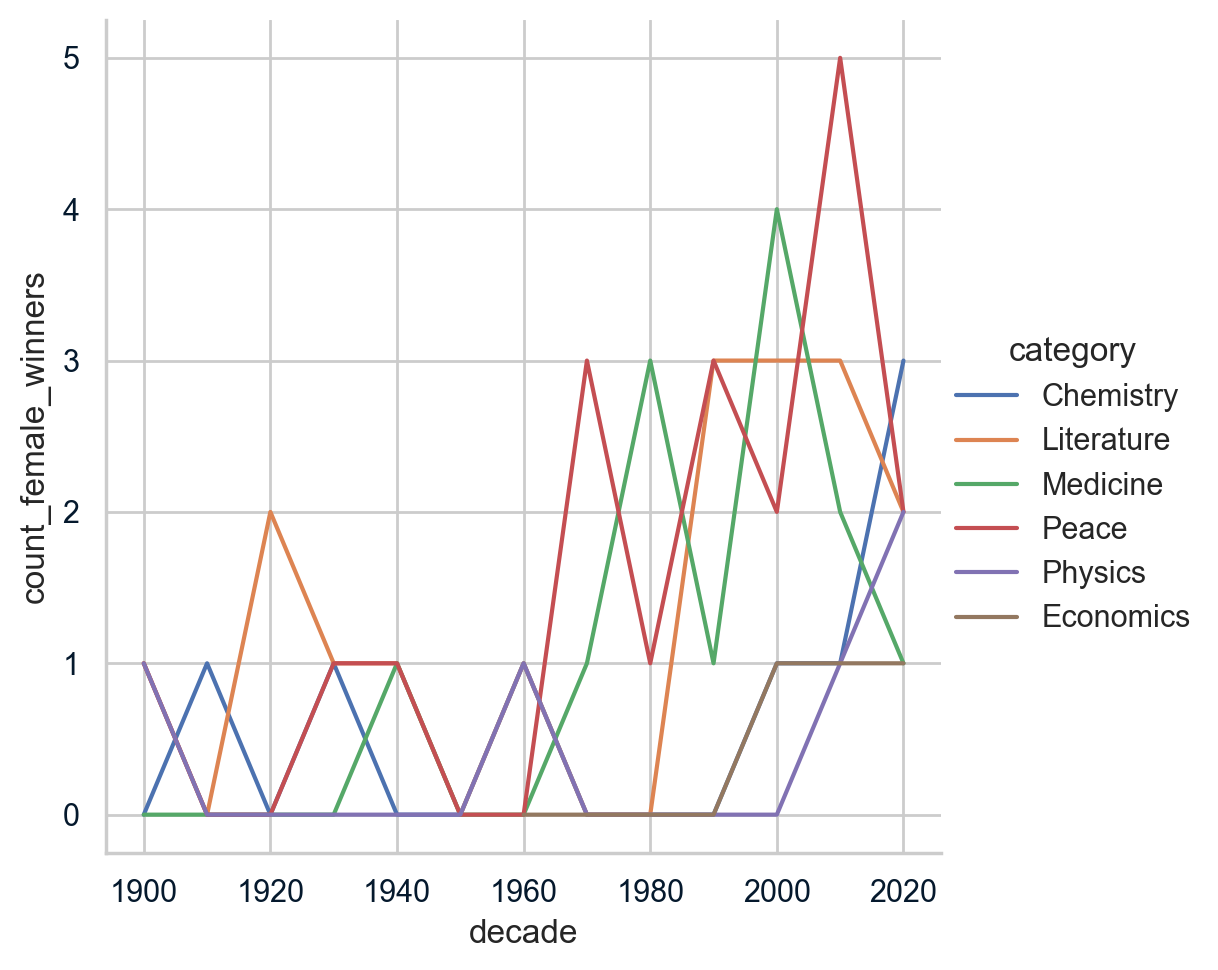

In [146]:
# Step 1: Determine if the winner is female
nobel_prize_df['female_winner'] = nobel_prize_df['sex'] == 'Female'

# Step 2: Create a decade column
nobel_prize_df['decade'] = (nobel_prize_df['year'] // 10) * 10

# Step 3: Group by decade and category, and count female winners
female_counts = nobel_prize_df.groupby(['decade', 'category'])['female_winner'].sum().reset_index()

# Renaming the count column for clarity
female_counts.rename(columns={'female_winner': 'count_female_winners'}, inplace=True)

max_index = female_counts['count_female_winners'].idxmax()

# Extracting the maximum combination
max_combination = female_counts.loc[max_index]

# Displaying the results
max_decade = max_combination['decade']
max_category = max_combination['category']
max_count = max_combination['count_female_winners']

print(f"The maximum combination is:\nDecade: {max_decade}, Category: {max_category}, Count of Female Winners: {max_count}")
sns.relplot(x="decade",y="count_female_winners",data=female_counts,hue="category",kind="line")


In [147]:
# the first female winner
min_row=female_df[female_df["year"]==female_df["year"].min()]
first_woman_name=min_row["full_name"].iloc[0]
first_woman_category=min_row["category"].iloc[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [148]:
# Multiple laureates winners
counts=nobel_prize_df["full_name"].value_counts()
repeat_list = counts[counts > 1].index.tolist()
print(repeat_list)


['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
